<a href="https://colab.research.google.com/github/BhargavAlpha/WeatherForecasting/blob/main/WeatherForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/train_data.csv", parse_dates=["startdate"])
test_df = pd.read_csv("/content/drive/MyDrive/test_data.csv", parse_dates=["startdate"])

In [ ]:
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [ ]:
# shape
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)

Train data shape:  (375734, 246)
Test data shape:  (31354, 245)


In [ ]:
# checking for null values in the dataframe
# isnull().sum().sum() will check the entire df not just columns
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

101772
0


In [ ]:
# Since training data has NaN values, we find out the columns containing NaN values
col_list = train_df.columns[train_df.isnull().any()].tolist()
col_list

['nmme0-tmp2m-34w__ccsm30',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-prate-34w__ccsm3',
 'nmme0-prate-56w__ccsm30',
 'nmme0-prate-34w__ccsm30',
 'nmme-prate-56w__ccsm3',
 'nmme-tmp2m-34w__ccsm3',
 'ccsm30']

In [ ]:
train_df[col_list]

,nmme0-tmp2m-34w__ccsm30,nmme-tmp2m-56w__ccsm3,nmme-prate-34w__ccsm3,nmme0-prate-56w__ccsm30,nmme0-prate-34w__ccsm30,nmme-prate-56w__ccsm3,nmme-tmp2m-34w__ccsm3,ccsm30
0,29.57,27.13,13.59,14.37,5.19,10.35,27.57,28.85
1,29.57,27.13,13.59,14.37,5.19,10.35,27.57,28.85
2,29.57,27.13,13.59,14.37,5.19,10.35,27.57,28.85
3,29.57,27.13,13.59,14.37,5.19,10.35,27.57,28.85
4,29.57,27.13,13.59,14.37,5.19,10.35,27.57,28.85
...,...,...,...,...,...,...,...,...
375729,20.25,17.32,9.40,23.77,5.57,11.96,16.96,20.56
375730,20.25,16.89,9.83,23.77,5.57,12.08,16.60,20.56
375731,20.25,16.45,10.26,23.77,5.57,12.19,16.23,20.56
375732,20.25,15.57,10.68,23.77,5.57,12.42,15.87,20.56


In [ ]:
#To fill missing (NaN) values with the most recent non-null value.
train_df.ffill(inplace=True)

In [ ]:
print(train_df.isnull().sum().sum())

0


In [ ]:
train_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.667604,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.512417,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.970000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,10.340000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,19.530000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [ ]:
train_df.dtypes.value_counts()

float64           240
int64               4
datetime64[ns]      1
object              1
dtype: int64

In [ ]:
train_df.select_dtypes(['object']).columns

Index(['climateregions__climateregion'], dtype='object')

<Axes: >

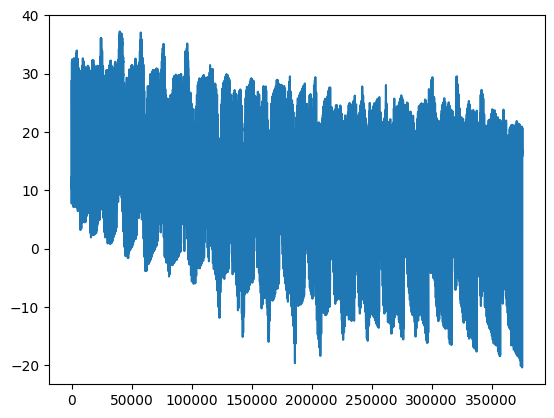

In [ ]:
train_df["contest-tmp2m-14d__tmp2m"].plot()

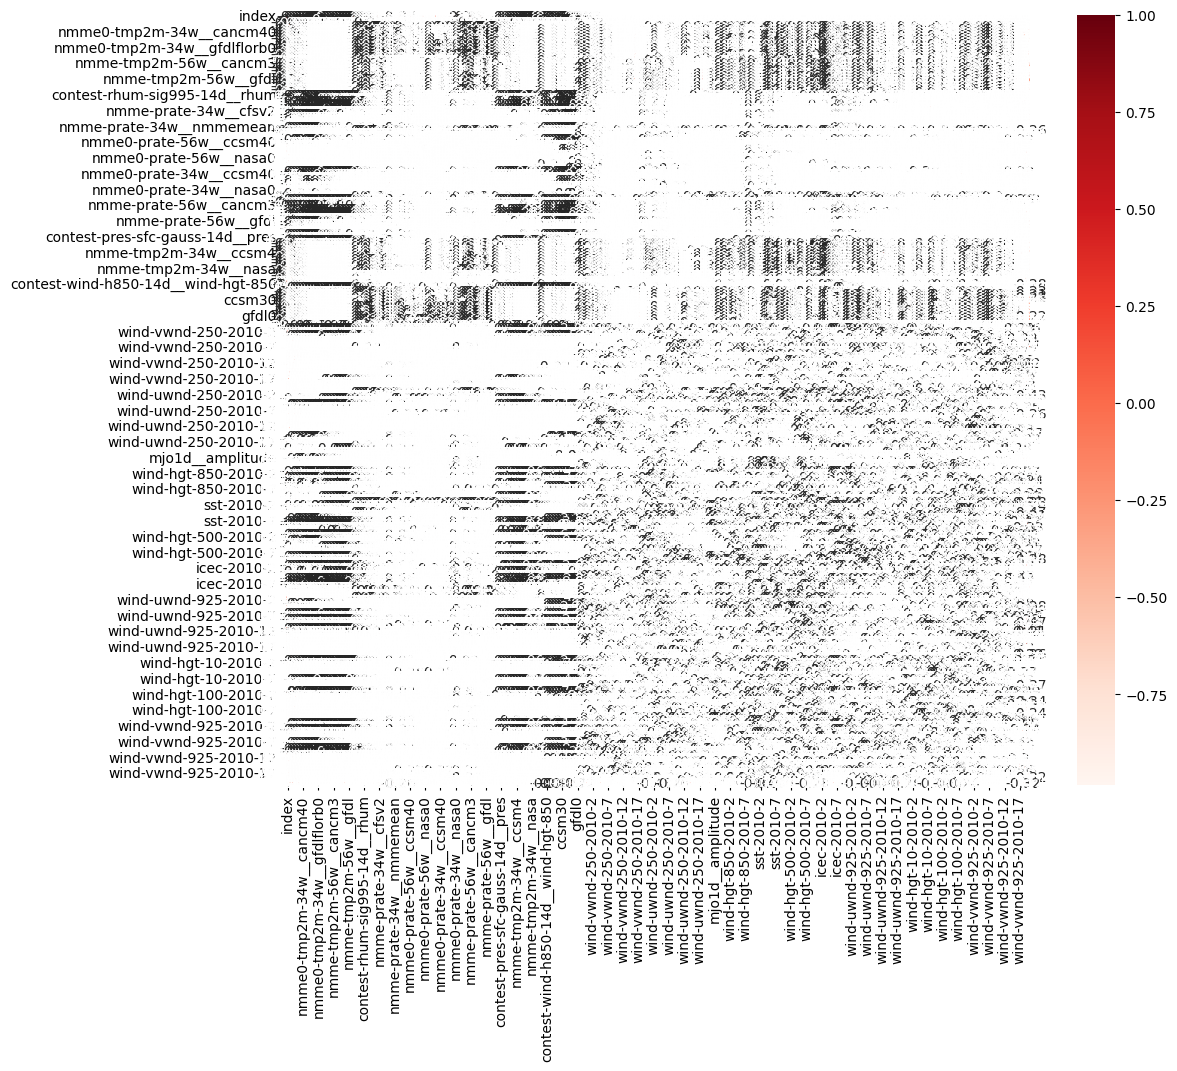

In [ ]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X = train_df.drop(columns="contest-tmp2m-14d__tmp2m")
y = train_df[["contest-tmp2m-14d__tmp2m"]]

In [ ]:
#Correlation with output variable
cor_target = abs(cor["contest-tmp2m-14d__tmp2m"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

contest-pevpr-sfc-gauss-14d__pevpr    0.805301
nmme0-tmp2m-34w__cancm30              0.834107
nmme0-tmp2m-34w__cancm40              0.830026
nmme0-tmp2m-34w__ccsm30               0.844315
nmme0-tmp2m-34w__ccsm40               0.828936
                                        ...   
icec-2010-9                           0.517935
wind-uwnd-925-2010-1                  0.798416
wind-hgt-10-2010-1                    0.815701
wind-hgt-100-2010-1                   0.802240
wind-vwnd-925-2010-1                  0.807371
Name: contest-tmp2m-14d__tmp2m, Length: 61, dtype: float64

In [ ]:
relevant_features.index

Index(['contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0',
       'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0',
       'nmme0-tmp2m-34w__nmme0mean', 'contest-wind-h10-14d__wind-hgt-10',
       'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__cancm4',
       'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4',
       'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl',
       'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb',
       'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean',
       'contest-rhum-sig995-14d__rhum', 'contest-wind-h100-14d__wind-hgt-100',
       'contest-tmp2m-14d__tmp2m', 'contest-slp-14d__slp',
       'nmme-tmp2m-34w__cancm3', 'nmme-tmp2m-34w__cancm4',
       'nmme-tmp2m-34w__ccsm3', 'nmme-tmp2m-34w__ccsm4',
       'nmme-tmp2m-34w__cfsv2', 'nmme-tmp2m-34w__gfd

In [ ]:
X=train_df[relevant_features.index]
X = X.drop(columns="contest-tmp2m-14d__tmp2m")
X

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,sst-2010-1,sst-2010-7,wind-hgt-500-2010-1,icec-2010-1,icec-2010-5,icec-2010-9,wind-uwnd-925-2010-1,wind-hgt-10-2010-1,wind-hgt-100-2010-1,wind-vwnd-925-2010-1
0,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,352.20,-25.20,-7267.97,-4.33,-0.08,0.03,143.64,-72427.68,-25749.70,-107.46
1,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,350.96,-25.84,-7189.77,-4.33,-0.08,0.03,143.41,-70659.22,-25474.37,-105.73
2,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,349.86,-26.26,-7090.19,-4.33,-0.08,0.03,145.35,-68699.81,-25200.29,-102.51
3,225.28,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,348.91,-26.48,-6914.23,-4.33,-0.08,0.03,146.90,-66588.29,-24789.70,-96.11
4,237.24,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,348.03,-26.78,-6652.36,-4.33,-0.08,0.03,148.67,-64311.30,-24181.96,-89.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,312.05,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,345.63,-24.30,-12684.25,-4.33,-0.08,0.03,180.48,-77124.59,-33937.59,-74.21
375730,305.82,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,346.04,-25.00,-12760.51,-4.33,-0.08,0.03,178.59,-75248.03,-33753.43,-68.27
375731,311.62,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,346.25,-25.53,-12908.98,-4.33,-0.08,0.03,174.91,-73470.02,-33582.60,-64.60
375732,304.54,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,346.13,-25.90,-13055.60,-4.33,-0.08,0.03,170.40,-72102.04,-33519.76,-65.69


In [ ]:
y

,contest-tmp2m-14d__tmp2m
0,28.744480
1,28.370585
2,28.133059
3,28.256798
4,28.372353
...,...
375729,17.150954
375730,16.962051
375731,16.915474
375732,16.536761


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
! pip install -q -U --pre pycaret
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 108.4 MB/s eta 0:0

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
reg  = CatBoostRegressor(iterations=3000, eval_metric='RMSE',learning_rate=0.2, random_seed= 1234,
                         depth=8)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

0:	learn: 8.1078073	test: 8.1078073	test1: 8.1016938	best: 8.1016938 (0)	total: 204ms	remaining: 10m 11s
100:	learn: 1.1389374	test: 1.1389374	test1: 1.1562979	best: 1.1562979 (100)	total: 14.5s	remaining: 6m 54s
200:	learn: 0.9129511	test: 0.9129511	test1: 0.9400669	best: 0.9400669 (200)	total: 29.1s	remaining: 6m 44s
300:	learn: 0.7915994	test: 0.7915994	test1: 0.8253462	best: 0.8253462 (300)	total: 43.7s	remaining: 6m 31s
400:	learn: 0.7102428	test: 0.7102428	test1: 0.7492927	best: 0.7492927 (400)	total: 58.2s	remaining: 6m 17s
500:	learn: 0.6494954	test: 0.6494954	test1: 0.6929771	best: 0.6929771 (500)	total: 1m 12s	remaining: 6m 1s
600:	learn: 0.6008979	test: 0.6008979	test1: 0.6488085	best: 0.6488085 (600)	total: 1m 28s	remaining: 5m 52s
700:	learn: 0.5606462	test: 0.5606462	test1: 0.6118205	best: 0.6118205 (700)	total: 1m 42s	remaining: 5m 37s
800:	learn: 0.5284472	test: 0.5284472	test1: 0.5821257	best: 0.5821257 (800)	total: 2m	remaining: 5m 30s
900:	learn: 0.4995773	test: 0.49

In [ ]:
X_test['prediction'] = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(y_test, X_test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 0.34


In [ ]:
relevant_features=relevant_features.drop(['contest-tmp2m-14d__tmp2m'])
tes = test_df[relevant_features.index]

In [ ]:
tes

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,sst-2010-1,sst-2010-7,wind-hgt-500-2010-1,icec-2010-1,icec-2010-5,icec-2010-9,wind-uwnd-925-2010-1,wind-hgt-10-2010-1,wind-hgt-100-2010-1,wind-vwnd-925-2010-1
0,339.88,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,345.33,-26.17,-13004.49,-4.33,-0.08,0.03,162.81,-69591.90,-33079.89,-63.13
1,334.63,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,344.50,-26.35,-12721.60,-4.33,-0.08,0.03,161.69,-68157.01,-32571.33,-65.09
2,337.83,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,343.40,-26.41,-12372.69,-4.33,-0.08,0.03,159.32,-66628.01,-31980.33,-69.02
3,345.81,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,341.91,-26.45,-12032.86,-4.33,-0.08,0.03,157.58,-65094.30,-31353.61,-73.49
4,357.39,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,340.22,-26.46,-11659.60,-4.33,-0.08,0.03,154.62,-63634.50,-30739.14,-74.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,62.72,4.60,8.71,6.05,10.08,6.39,8.42,9.08,5.53,6.97,...,112.99,-1.49,491.27,-4.32,-0.08,0.03,-15.83,54805.76,1560.58,74.40
31350,73.41,4.60,8.71,6.05,10.08,6.39,8.42,9.08,5.53,6.97,...,107.32,0.01,907.33,-4.32,-0.08,0.02,-21.85,56765.61,2535.83,81.76
31351,70.00,4.60,8.71,6.05,10.08,6.39,8.42,9.08,5.53,6.97,...,101.53,1.64,1409.29,-4.32,-0.08,0.02,-24.12,59110.96,3643.73,85.94
31352,79.81,4.60,8.71,6.05,10.08,6.39,8.42,9.08,5.53,6.97,...,95.67,3.35,1979.81,-4.31,-0.08,0.02,-25.98,61794.80,4914.04,88.03


In [ ]:
predictions = reg.predict(tes)

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/sample_solution (2).csv')
sub['contest-tmp2m-14d__tmp2m'] = predictions
sub.to_csv('submission.csv' ,index = False)

In [ ]:
sub.head()

,contest-tmp2m-14d__tmp2m,index
0,28.740833,375734
1,28.651856,375735
2,28.527187,375736
3,28.739515,375737
4,28.783077,375738
